# Introduction
In this notebook, we analyse the changes in option greeks (delta, gamma, theta, vega) for various strategies.

# Black Scholes Model

In [80]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [81]:
N = norm.cdf

def d1(S, K, r, T, sigma):
    return (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))

def d2(S, K, r, T, sigma):
    return d1(S, K, r, T, sigma) - sigma * np.sqrt(T)

def BS_CALL(S, K, T, r, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return S * N(d1_value) - K * np.exp(-r*T)* N(d2_value)

def BS_PUT(S, K, T, r, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return K*np.exp(-r*T)*N(-d2_value) - S*N(-d1_value)

# Constant Variables for Analysis
Throughout this analysis, we will assume the following default values for each factor that drives options prices:

In [82]:
S = 100         # Spot price (Change this to analyse ATM, OTM and ITM options)
K = 100         # Strike price
t = 30          # Time to maturity in DAYS
r = 0.05        # Risk-free interest rate
sigma = 0.5     # Volatility of the underlying

# Option Greeks Formulas

In [83]:
def delta_call(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return norm.cdf(d1_value)

def delta_put(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return norm.cdf(d1_value) - 1

def gamma_call(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return norm.pdf(d1_value) / (S * sigma * np.sqrt(T))

def theta_call(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return (-S * norm.pdf(d1_value) * sigma / (2 * np.sqrt(T))) - (r * K * np.exp(-r * T) * norm.cdf(d2_value))

def theta_put(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return (-S * norm.pdf(d1_value) * sigma / (2 * np.sqrt(T))) + (r * K * np.exp(-r * T) * norm.cdf(-d2_value))

def vega(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return S * norm.pdf(d1_value) * np.sqrt(T) / 100

In [84]:
def plot_greek(prices, greek_values, title, ylabel, legend):
    plt.title(title)
    plt.xlabel(xlabel='Spot Price')
    plt.ylabel(ylabel=ylabel)
    plt.plot(prices, greek_values, label=legend)
    plt.legend()

## Bull Call (Debit) Spread
This strategies involves 2 legs:
- 1 Buy OTM K1 Call @ P1
- 1 Sell OTM K2 Call @ P2

where K1 < K2 (and P1 > P2).

In [85]:
def bull_call_spread(K1, K2, r, t, sigma):
    S = np.arange(K1 * 0.5, K2 * 1.5, 1)
    plt.figure(figsize=(20, 5))

    # Plot Delta
    lo_call_deltas = delta_call(S, K1, r, t/365, sigma)             # Long
    hi_call_deltas = delta_call(S, K2, r, t/365, sigma) * -1        # Short
    ov_call_deltas = lo_call_deltas + hi_call_deltas
    plt.subplot(1, 4, 1)
    plot_greek(prices=S, greek_values=ov_call_deltas, title='Bull Call Spread Analysis - Delta',
               ylabel='Delta', legend='Delta')

    # Plot Gamma
    lo_call_gammas = gamma_call(S, K1, r, t/365, sigma)             # Long
    hi_call_gammas = gamma_call(S, K2, r, t/365, sigma) * -1        # Short
    ov_call_gammas = lo_call_gammas + hi_call_gammas
    plt.subplot(1, 4, 2)
    plot_greek(prices=S, greek_values=ov_call_gammas, title='Bull Call Spread Analysis - Gamma',
               ylabel='Gamma', legend='Gamma')

    # Plot Theta
    lo_call_thetas = theta_call(S, K1, r, t/365, sigma)             # Long
    hi_call_thetas = theta_call(S, K2, r, t/365, sigma) * -1        # Short
    ov_call_thetas = lo_call_thetas + hi_call_thetas
    plt.subplot(1, 4, 3)
    plot_greek(prices=S, greek_values=ov_call_thetas, title='Bull Call Spread Analysis - Theta',
               ylabel='Theta', legend='Theta')
    # Plot vega
    lo_call_vegas = vega(S, K1, r, t/365, sigma)                    # Long
    hi_call_vegas = vega(S, K2, r, t/365, sigma) * -1               # Short
    ov_call_vegas = lo_call_vegas + hi_call_vegas
    plt.subplot(1, 4, 4)
    plot_greek(prices=S, greek_values=ov_call_vegas, title='Bull Call Spread Analysis - Vega',
               ylabel='Vega', legend='Vega')

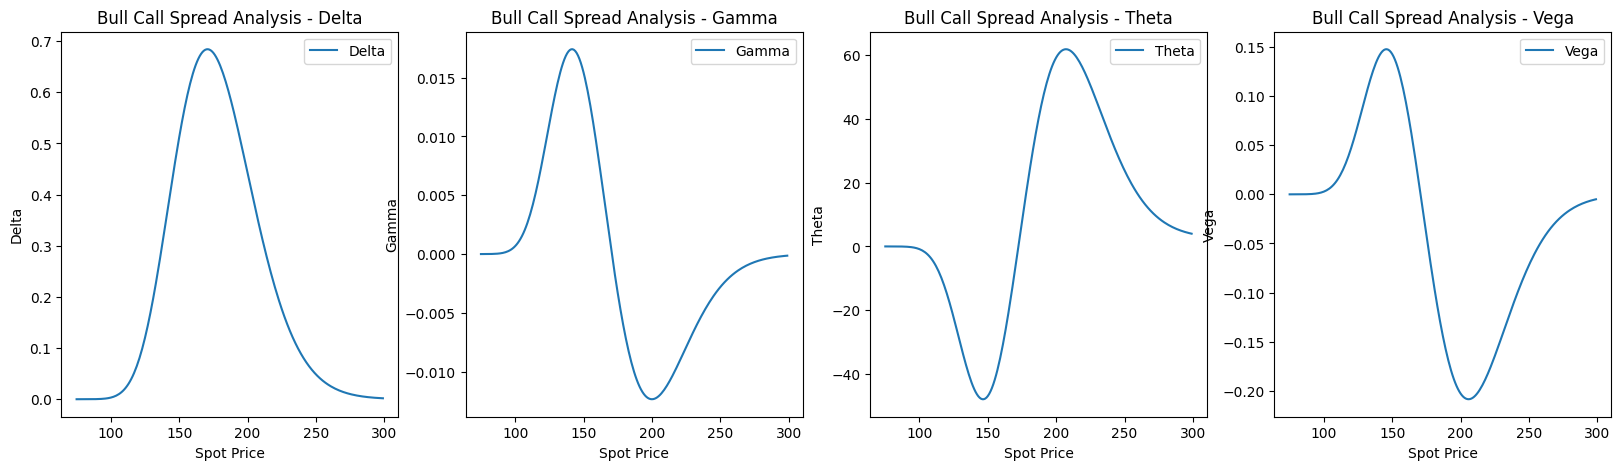

In [86]:
bull_call_spread(K1=150, K2=200, r=r, t=t, sigma=sigma)

## Bear Call Spread
This strategy involves 2 legs:
- 1 Buy OTM K1 Call @ P1
- 1 Sell OTM K2 Call @ P2

where K1 > K2 (and P1 < P2).

In [91]:
def bear_call_spread(K1, K2, r, t, sigma):
    S = np.arange(K1 * 0.5, K2 * 1.5, 1)
    plt.figure(figsize=(20, 5))

    # Plot Delta
    lo_call_deltas = delta_call(S, K2, r, t/365, sigma) * -1        # Short
    hi_call_deltas = delta_call(S, K1, r, t/365, sigma)             # Long
    ov_call_deltas = lo_call_deltas + hi_call_deltas
    plt.subplot(1, 4, 1)
    plot_greek(prices=S, greek_values=ov_call_deltas, title='Bear Call Spread Analysis - Delta',
               ylabel='Delta', legend='Delta')

    # Plot Gamma
    lo_call_gammas = gamma_call(S, K2, r, t/365, sigma) * -1        # Short
    hi_call_gammas = gamma_call(S, K1, r, t/365, sigma)             # Long
    ov_call_gammas = lo_call_gammas + hi_call_gammas
    plt.subplot(1, 4, 2)
    plot_greek(prices=S, greek_values=ov_call_gammas, title='Bear Call Spread Analysis - Gamma',
               ylabel='Gamma', legend='Gamma')

    # Plot Theta
    lo_call_thetas = theta_call(S, K2, r, t/365, sigma) * -1        # Short
    hi_call_thetas = theta_call(S, K1, r, t/365, sigma)             # Long
    ov_call_thetas = lo_call_thetas + hi_call_thetas
    plt.subplot(1, 4, 3)
    plot_greek(prices=S, greek_values=ov_call_thetas, title='Bear Call Spread Analysis - Theta',
               ylabel='Theta', legend='Theta')
    # Plot vega
    lo_call_vegas = vega(S, K2, r, t/365, sigma) * -1               # Short
    hi_call_vegas = vega(S, K1, r, t/365, sigma)                    # Long
    ov_call_vegas = lo_call_vegas + hi_call_vegas
    plt.subplot(1, 4, 4)
    plot_greek(prices=S, greek_values=ov_call_vegas, title='Bear Call Spread Analysis - Vega',
               ylabel='Vega', legend='Vega')

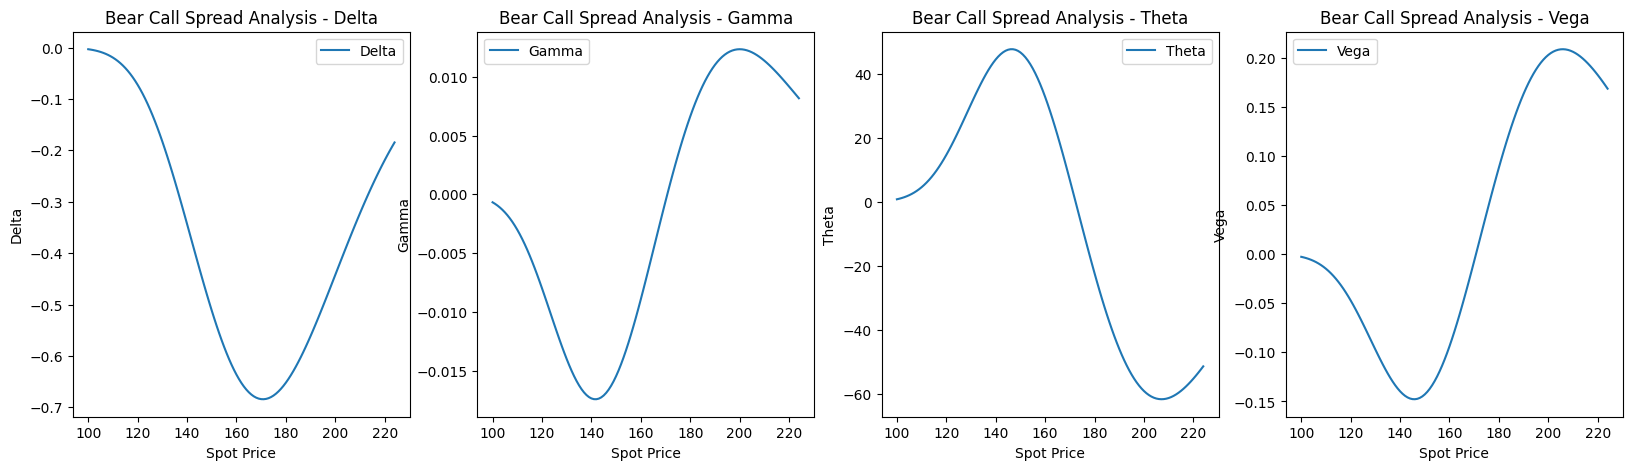

In [92]:
bear_call_spread(K1=200, K2=150, r=r, t=t, sigma=sigma)